In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D
from keras import metrics
from keras.models import model_from_json
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

Using TensorFlow backend.


In [2]:
mnist_folder = "./mnist"
op_folder = "./result/mnist"
X_train = np.load(mnist_folder + "/x_train.npy")
y_train = np.load(mnist_folder + "/y_train.npy")
X_test = np.load(mnist_folder + "/x_test.npy")
y_test = np.load(mnist_folder + "/y_test.npy")

In [3]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train.shape

(60000, 28, 28, 1)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=7, strides=1, activation="relu", input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.output_shape
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3965952   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 3,977,930
Trainable params: 3,977,866
Non-trainable params: 64
_________________________________________________________________

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 66s 1ms/step - loss: 1.1054 - acc: 0.8995 - val_loss: 0.0794 - val_acc: 0.9780
Epoch 2/4
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0439 - acc: 0.9879 - val_loss: 0.0525 - val_acc: 0.9853
Epoch 3/4
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0533 - val_acc: 0.9847
Epoch 4/4
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0544 - val_acc: 0.9855


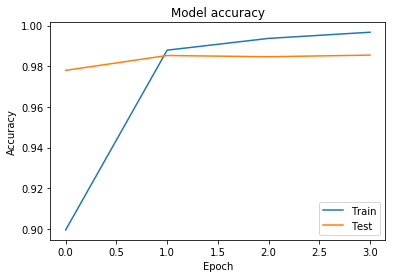

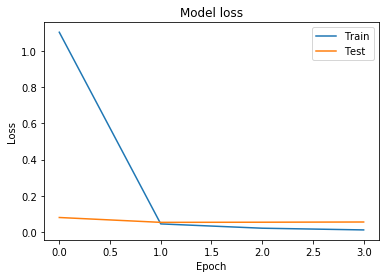

In [5]:
if not os.path.exists(op_folder):
    os.makedirs(op_folder)
    
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=300)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig(op_folder + "/accuracy.png", bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig(op_folder + "/loss.png", bbox_inches='tight')
plt.show()

In [6]:
# Final evaluation of the model
y_pred = model.predict(X_test)


In [7]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fscore = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

np.savetxt(op_folder + "/confusion_matrix.txt", cm, fmt="%d")
with open(op_folder + "/scores.txt", 'w') as the_file:
    the_file.write("Accuracy " + str(accuracy) + 
                  "\nPrecision " + str(precision) + 
                  "\nRecall " + str(recall) +
                  "\nFscore " + str(fscore))

print ("Accuracy " + str(accuracy) + 
      "\nPrecision " + str(precision) + 
      "\nRecall " + str(recall) +
      "\nFscore " + str(fscore))

Accuracy 0.9855
Precision 0.9852220721591435
Recall 0.9853429782778328
Fscore 0.9852384898954405
